# Time series analysis
 Lund University

## Example code 3: examining the ACF and PACF.

**Reference:**  
*An Introduction to Time Series Modeling*, 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

Lets have fun!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import sys
import os
# import TSA library
sys.path.append(os.path.join('..', 'TimeSeriesAnalysis-main', 'TimeSeriesAnalysis-main'))
sys.path.append('../data')

from tsa_lth.analysis import acf, pacf, pzmap
from tsa_lth.tools.esacf import esacf

### Simulate some processes. Ignore the initial samples to avoid any initialization effects.

In [2]:
extraN = 100
N = 100                                         # Also try using N = 1000.
C = np.array([1, 0.6, 0.5, -0.8])
A = np.array([1, -0.6, 0.8])
e = np.random.randn(N + extraN)
y1 = lfilter(C, [1], e)[extraN:]     # y1 = y1[extraN:]
y2 = lfilter([1], A, e)[extraN:]     # y2 = y2[extraN:]
y3 = lfilter(C, A, e)[extraN:]       # y3 = y3[extraN:]



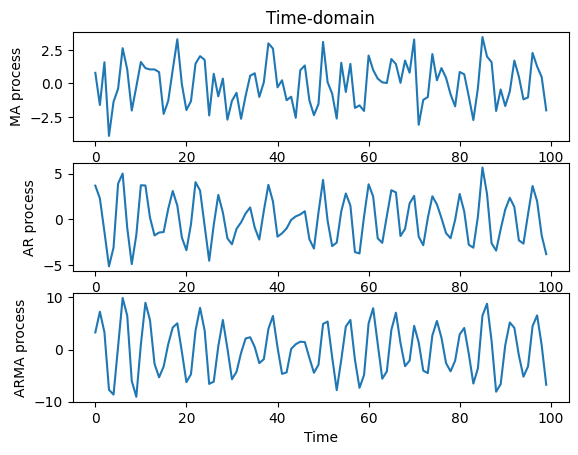

In [3]:
# Plot realisations as well as roots of the AR polynomial.
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(y1)
plt.title('Time-domain')
plt.ylabel('MA process')
plt.subplot(3, 1, 2)
plt.plot(y2)
plt.ylabel('AR process')
plt.subplot(3, 1, 3)
plt.plot(y3)
plt.ylabel('ARMA process')
plt.xlabel('Time')
plt.show()

### Check that the polynomial is stable. The roots should be inside the unit circle.

<Figure size 640x480 with 0 Axes>

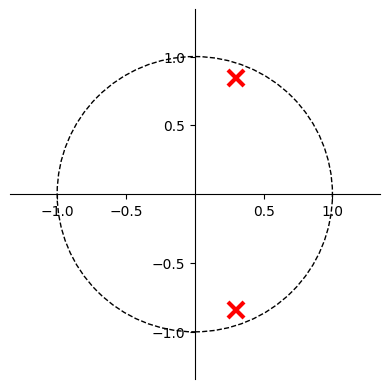

In [4]:
plt.figure()
pzmap(1, A, show=True)
plt.show()

### Examine ACF and PACF. 
 Can you determine which model that could be suitable? Which model order to try? Note how similar the results are - does this mean either models is just as good?

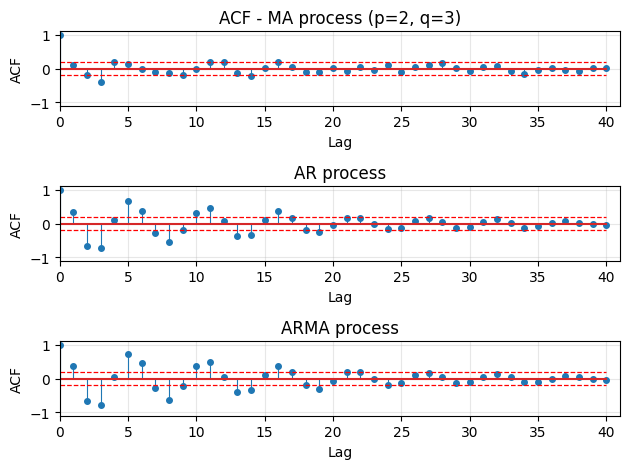

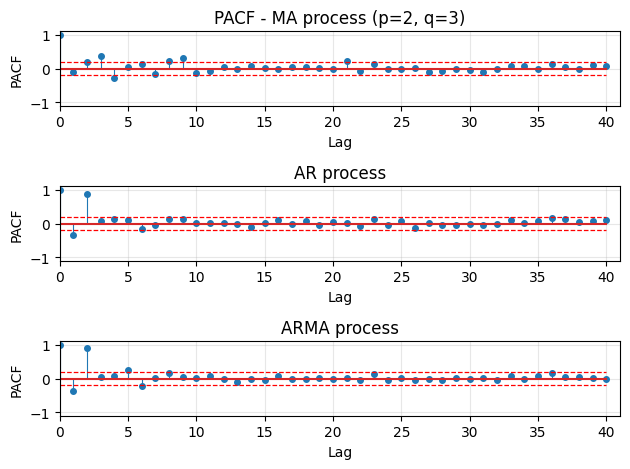

In [5]:
noLags = 40
p = len(A) - 1
q = len(C) - 1

plt.figure()

# ACF for y1 (MA process)
plt.subplot(311)
acf(y1, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title(f'ACF - MA process (p={p}, q={q})')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y2 (AR process)
plt.subplot(312)
acf(y2, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('AR process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y3 (ARMA process)
plt.subplot(313)
acf(y3, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('ARMA process')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure()

# PACF for y1 (MA process)
plt.subplot(311)
pacf(y1, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title(f'PACF - MA process (p={p}, q={q})')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y2 (AR process)
plt.subplot(312)
pacf(y2, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('AR process')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y3 (ARMA process)
plt.subplot(313)
pacf(y3, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('ARMA process')
plt.ylabel('PACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Examine the ESACF. This is not always all that helpful.

In [6]:



esacfM, esacfX, condInt = esacf(y3, 6, 8)
print(f'ESACF - ARMA({p},{q}). Noise threshold: {condInt:.4f}')
print('\nESACF Matrix:')
print('esacfM =')
for i, row in enumerate(esacfM):
    print(f'  {" ".join(f"{val:8.4f}" for val in row)}')

print('\nESACF Significance Matrix (values > threshold):')
print('esacfX =')
for i, row in enumerate(esacfX.astype(int)):
    print(f'  {" ".join(str(val) for val in row)}')



ESACF - ARMA(2,3). Noise threshold: 0.2144

ESACF Matrix:
esacfM =
    0.4959  -0.9316  -1.0959   0.0800   1.0000   0.6398  -0.4029  -0.8640
    0.4821  -0.9391  -1.0817   0.0974   1.0000   0.6209  -0.4163  -0.8530
    0.4889  -0.9462  -1.0911   0.0993   1.0000   0.6191  -0.4073  -0.8498
    0.5131  -0.9406  -1.1080   0.0789   1.0000   0.6413  -0.3931  -0.8641
    0.4834  -0.9675  -1.0910   0.1157   1.0000   0.6137  -0.4008  -0.8443
    0.5134  -0.9613  -1.1119   0.0854   1.0000   0.6537  -0.3681  -0.8566

ESACF Significance Matrix (values > threshold):
esacfX =
  1 1 1 0 1 1 1 1
  1 1 1 0 1 1 1 1
  1 1 1 0 1 1 1 1
  1 1 1 0 1 1 1 1
  1 1 1 0 1 1 1 1
  1 1 1 0 1 1 1 1


# What happens if there is a season in the data?

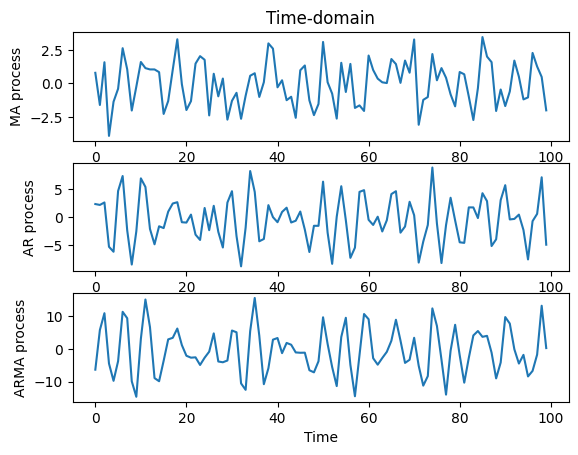

In [7]:
s = 24
A = np.convolve(A, np.concatenate([[1], np.zeros(s-1), [-1]]))
y1 = lfilter(C, [1], e)[extraN:]     # y1 = y1[extraN:]
y2 = lfilter([1], A, e)[extraN:]     # y2 = y2[extraN:]
y3 = lfilter(C, A, e)[extraN:]       # y3 = y3[extraN:]

# Plot realisations, ACF, and PACF.
p = len(A) - 1
q = len(C) - 1
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(y1)
plt.title('Time-domain')
plt.ylabel('MA process')
plt.subplot(3, 1, 2)
plt.plot(y2)
plt.ylabel('AR process')
plt.subplot(3, 1, 3)
plt.plot(y3)
plt.ylabel('ARMA process')
plt.xlabel('Time')
plt.show()

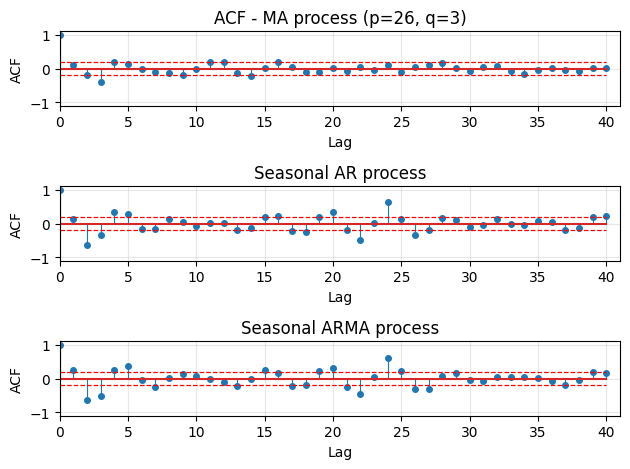

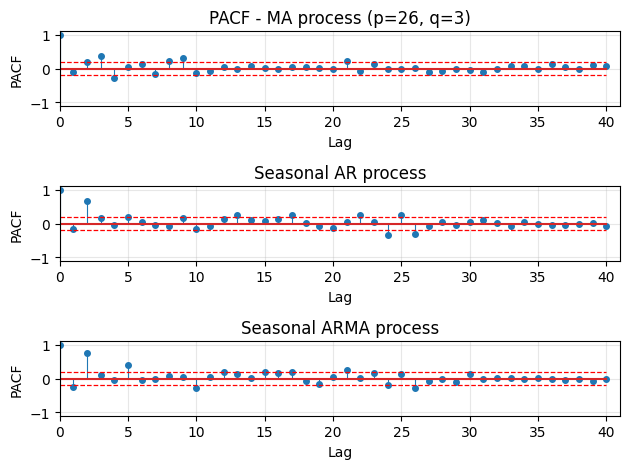

In [8]:
plt.figure()

# ACF for y1 (MA process) with seasonal component
plt.subplot(311)
acf(y1, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title(f'ACF - MA process (p={p}, q={q})')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y2 (Seasonal AR process)
plt.subplot(312)
acf(y2, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('Seasonal AR process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y3 (Seasonal ARMA process)
plt.subplot(313)
acf(y3, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)

plt.title('Seasonal ARMA process')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure()

# PACF for y1 (MA process) with seasonal component
plt.subplot(311)
pacf(y1, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title(f'PACF - MA process (p={p}, q={q})')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y2 (Seasonal AR process)
plt.subplot(312)
pacf(y2, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('Seasonal AR process')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y3 (Seasonal ARMA process)
plt.subplot(313)
pacf(y3, noLags, signLvl=0.05, plotIt=1, includeZeroLag=1)
plt.title('Seasonal ARMA process')
plt.ylabel('PACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()